In [1]:
import os
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Download latest version
path = kagglehub.dataset_download("zadafiyabhrami/global-crocodile-species-dataset")

print("Path to dataset files:", path)

c:\Users\trian\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\trian\.cache\kagglehub\datasets\zadafiyabhrami\global-crocodile-species-dataset\versions\1


In [1]:
import pandas as pd
import matplotlib as plt
import os

In [2]:
df = pd.read_csv('crocodile_dataset.csv')

df.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [3]:
df.columns

Index(['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus',
       'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
       'Date of Observation', 'Country/Region', 'Habitat Type',
       'Conservation Status', 'Observer Name', 'Notes'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Observation ID        1000 non-null   int64  
 1   Common Name           1000 non-null   object 
 2   Scientific Name       1000 non-null   object 
 3   Family                1000 non-null   object 
 4   Genus                 1000 non-null   object 
 5   Observed Length (m)   1000 non-null   float64
 6   Observed Weight (kg)  1000 non-null   float64
 7   Age Class             1000 non-null   object 
 8   Sex                   1000 non-null   object 
 9   Date of Observation   1000 non-null   object 
 10  Country/Region        1000 non-null   object 
 11  Habitat Type          1000 non-null   object 
 12  Conservation Status   1000 non-null   object 
 13  Observer Name         1000 non-null   object 
 14  Notes                 1000 non-null   object 
dtypes: float64(2), int64(1

In [5]:
df.drop(["Observation ID", "Family", "Common Name", "Genus", "Observer Name", "Notes", "Conservation Status"], axis=1, inplace=True)

df.columns

Index(['Scientific Name', 'Observed Length (m)', 'Observed Weight (kg)',
       'Age Class', 'Sex', 'Date of Observation', 'Country/Region',
       'Habitat Type'],
      dtype='object')

In [6]:
df.head()

,Scientific Name,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type
0,Crocodylus moreletii,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps
1,Crocodylus acutus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves
2,Crocodylus intermedius,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas
3,Crocodylus moreletii,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers
4,Crocodylus palustris,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers


In [7]:
df["Date of Observation"] = pd.to_datetime(df["Date of Observation"], format="%d-%m-%Y")

# Extract year, month, and day into new columns
df['Year'] = df["Date of Observation"].dt.year
df['Month'] = df["Date of Observation"].dt.month
df['Day'] = df["Date of Observation"].dt.day

# Drop the original date column
df = df.drop("Date of Observation", axis=1)

In [8]:
df.head()

,Scientific Name,Observed Length (m),Observed Weight (kg),Age Class,Sex,Country/Region,Habitat Type,Year,Month,Day
0,Crocodylus moreletii,1.90,62.0,Adult,Male,Belize,Swamps,2018,3,31
1,Crocodylus acutus,4.09,334.5,Adult,Male,Venezuela,Mangroves,2015,1,28
2,Crocodylus intermedius,1.08,118.2,Juvenile,Unknown,Venezuela,Flooded Savannas,2010,12,7
3,Crocodylus moreletii,2.42,90.4,Adult,Male,Mexico,Rivers,2019,11,1
4,Crocodylus palustris,3.75,269.4,Adult,Unknown,India,Rivers,2019,7,15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Scientific Name       1000 non-null   object 
 1   Observed Length (m)   1000 non-null   float64
 2   Observed Weight (kg)  1000 non-null   float64
 3   Age Class             1000 non-null   object 
 4   Sex                   1000 non-null   object 
 5   Country/Region        1000 non-null   object 
 6   Habitat Type          1000 non-null   object 
 7   Year                  1000 non-null   int32  
 8   Month                 1000 non-null   int32  
 9   Day                   1000 non-null   int32  
dtypes: float64(2), int32(3), object(5)
memory usage: 66.5+ KB


In [10]:
df["Season"] = df["Month"]%12 // 3 + 1
df["Season"] = df["Season"].map({1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"})
df.drop(["Year", "Month", "Day"], axis=1, inplace=True)

df.head()

,Scientific Name,Observed Length (m),Observed Weight (kg),Age Class,Sex,Country/Region,Habitat Type,Season
0,Crocodylus moreletii,1.90,62.0,Adult,Male,Belize,Swamps,Spring
1,Crocodylus acutus,4.09,334.5,Adult,Male,Venezuela,Mangroves,Winter
2,Crocodylus intermedius,1.08,118.2,Juvenile,Unknown,Venezuela,Flooded Savannas,Winter
3,Crocodylus moreletii,2.42,90.4,Adult,Male,Mexico,Rivers,Fall
4,Crocodylus palustris,3.75,269.4,Adult,Unknown,India,Rivers,Summer


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Scientific Name       1000 non-null   object 
 1   Observed Length (m)   1000 non-null   float64
 2   Observed Weight (kg)  1000 non-null   float64
 3   Age Class             1000 non-null   object 
 4   Sex                   1000 non-null   object 
 5   Country/Region        1000 non-null   object 
 6   Habitat Type          1000 non-null   object 
 7   Season                1000 non-null   object 
dtypes: float64(2), object(6)
memory usage: 62.6+ KB


In [12]:
X = df.drop("Scientific Name", axis=1)
y = df["Scientific Name"]

In [13]:
print(df["Age Class"].value_counts())

Age Class
Adult        510
Subadult     247
Juvenile     194
Hatchling     49
Name: count, dtype: int64


In [14]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
ordinal_cols = ['Age Class']
# Find all 'object' columns that are NOT the designated ordinal column
nominal_cols = X.select_dtypes(include=['object']).drop(columns=ordinal_cols).columns.tolist()

In [15]:
# Preprocessor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

age_order = ['Hatchling', 'Juvenile', 'Subadult', 'Adult']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('ord', OrdinalEncoder(categories=[age_order]), ordinal_cols),
        ('nom', OneHotEncoder(drop='first', handle_unknown="ignore", sparse_output=False), nominal_cols)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

In [17]:
print("Shape of the processed data:", X_processed)

Shape of the processed data: [[-0.46956529 -0.53553594  3.         ...  1.          0.
   0.        ]
 [ 1.52680052  1.02072498  3.         ...  0.          0.
   1.        ]
 [-1.217063   -0.21457497  1.         ...  0.          0.
   1.        ]
 ...
 [-0.06846897 -0.35563789  3.         ...  0.          0.
   1.        ]
 [ 0.36909066 -0.04667012  3.         ...  0.          1.
   0.        ]
 [-0.62453433 -0.61891726  1.         ...  1.          0.
   0.        ]]


In [18]:
# Do the label encoder for machine learning
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [27]:
# --- See the results ---
print("Original y labels:")
print(y)
print("\nEncoded y labels:")
print(y_encoded)

Original y labels:
0        Crocodylus moreletii
1           Crocodylus acutus
2      Crocodylus intermedius
3        Crocodylus moreletii
4        Crocodylus palustris
                ...          
995         Crocodylus suchus
996          Crocodylus halli
997    Mecistops cataphractus
998    Mecistops cataphractus
999          Crocodylus halli
Name: Scientific Name, Length: 1000, dtype: object

Encoded y labels:
[ 5  0  2  5  8  8 12 16 13  5 17  5 12  0 17  5  5  6 10  9 10  6 16 11
  6 11  8  2 12  2 12  0 11  4  7  4 17 14  3 13  8  6 12  5  5  5  0  2
 14  7  0 14 12  9  7 14  2 10 14  9  7 12 17  6  3 10 16 11  0 15  9 15
 14  6 11 10  5 13 15  9  5 13  4 12  5 15 17  8  0  1  5  6  0  2  8 13
 13 10 11  7  9  4 14 13 11  1 13 14  3  5  6  9  3  3  9  1  9 13  2  9
 17  1 17 11  8  0 14  2  0 12 13 11  7  6 13 17  7  1  9  7 15  4 13  8
 15 10  5 14 17 12  3 17  7  6 10  5 13  9  7 16 14 12  5 17 10 14  9  6
 17  0  9  7 16  0  3  0 16 11  5 15  2  8  9  7 11 15 17 10  5  2 11 

In [19]:
# --- See the results ---
print("Original x labels:")
print(X)

# Already encoded
print("Encoded x label")
print(X_processed)

Original x labels:
     Observed Length (m)  Observed Weight (kg) Age Class      Sex  \
0                   1.90                  62.0     Adult     Male   
1                   4.09                 334.5     Adult     Male   
2                   1.08                 118.2  Juvenile  Unknown   
3                   2.42                  90.4     Adult     Male   
4                   3.75                 269.4     Adult  Unknown   
..                   ...                   ...       ...      ...   
995                 2.55                 112.3     Adult   Female   
996                 2.27                  80.3  Subadult   Female   
997                 2.34                  93.5     Adult     Male   
998                 2.82                 147.6     Adult     Male   
999                 1.73                  47.4  Juvenile  Unknown   

       Country/Region          Habitat Type  Season  
0              Belize                Swamps  Spring  
1           Venezuela             Mangroves 

In [20]:
# Do the train test split for training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_processed, y_encoded, test_size=0.2, random_state=42)

In [21]:
print(X_train)

[[ 2.09198171  2.40337001  3.         ...  0.          1.
   0.        ]
 [ 1.40829479  1.31370181  2.         ...  0.          0.
   0.        ]
 [-0.67011346 -0.62748383  2.         ...  0.          0.
   1.        ]
 ...
 [ 2.18313996  2.74546186  3.         ...  0.          0.
   0.        ]
 [ 0.35997484 -0.12434039  3.         ...  0.          0.
   1.        ]
 [ 0.15031085 -0.26311889  3.         ...  0.          1.
   0.        ]]


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

results_list = []

models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0, target_names=le.classes_, output_dict=True)
    f1_weighted = report['weighted avg']['f1-score']

    results_list.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1-Score": f1_weighted
    })

    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("="*40 + "\n")

result_df = pd.DataFrame(results_list)

--- Logistic Regression ---
Accuracy: 0.9800
Classification Report:
{'Crocodylus acutus': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19.0}, 'Crocodylus halli': {'precision': 0.6666666666666666, 'recall': 1.0, 'f1-score': 0.8, 'support': 8.0}, 'Crocodylus intermedius': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7.0}, 'Crocodylus johnstoni': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9.0}, 'Crocodylus mindorensis': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13.0}, 'Crocodylus moreletii': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17.0}, 'Crocodylus niloticus': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9.0}, 'Crocodylus novaeguineae': {'precision': 1.0, 'recall': 0.7647058823529411, 'f1-score': 0.8666666666666667, 'support': 17.0}, 'Crocodylus palustris': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8.0}, 'Crocodylus porosus': {'precision': 1.0, 'recall': 1.0

c:\Users\trian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:19:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---
Accuracy: 0.9850
Classification Report:
{'Crocodylus acutus': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19.0}, 'Crocodylus halli': {'precision': 0.8, 'recall': 1.0, 'f1-score': 0.8888888888888888, 'support': 8.0}, 'Crocodylus intermedius': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 7.0}, 'Crocodylus johnstoni': {'precision': 1.0, 'recall': 0.8888888888888888, 'f1-score': 0.9411764705882353, 'support': 9.0}, 'Crocodylus mindorensis': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13.0}, 'Crocodylus moreletii': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17.0}, 'Crocodylus niloticus': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9.0}, 'Crocodylus novaeguineae': {'precision': 1.0, 'recall': 0.8823529411764706, 'f1-score': 0.9375, 'support': 17.0}, 'Crocodylus palustris': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8.0}, 'Crocodylus porosus': {'precision': 1.0, 'recall

C:\Users\trian\AppData\Local\Temp\ipykernel_17296\3007851886.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=result_df, palette="magma")


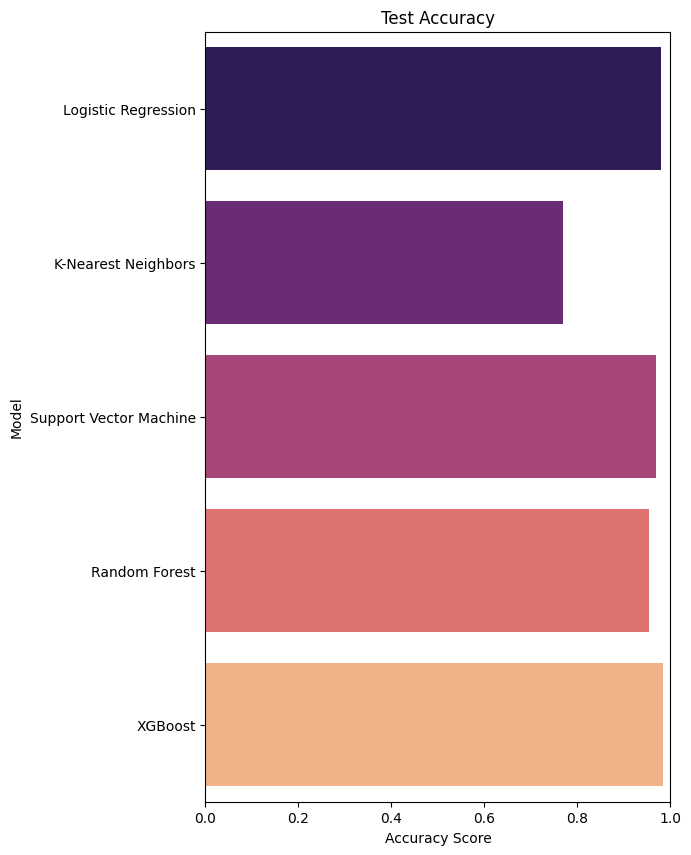

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 10))
sns.barplot(x="Accuracy", y="Model", data=result_df, palette="magma")
plt.title("Test Accuracy")
plt.xlabel("Accuracy Score")
plt.ylabel("Model")
plt.xlim(0, 1)
plt.show()

--- Confusion Matrix for Logistic Regression ---


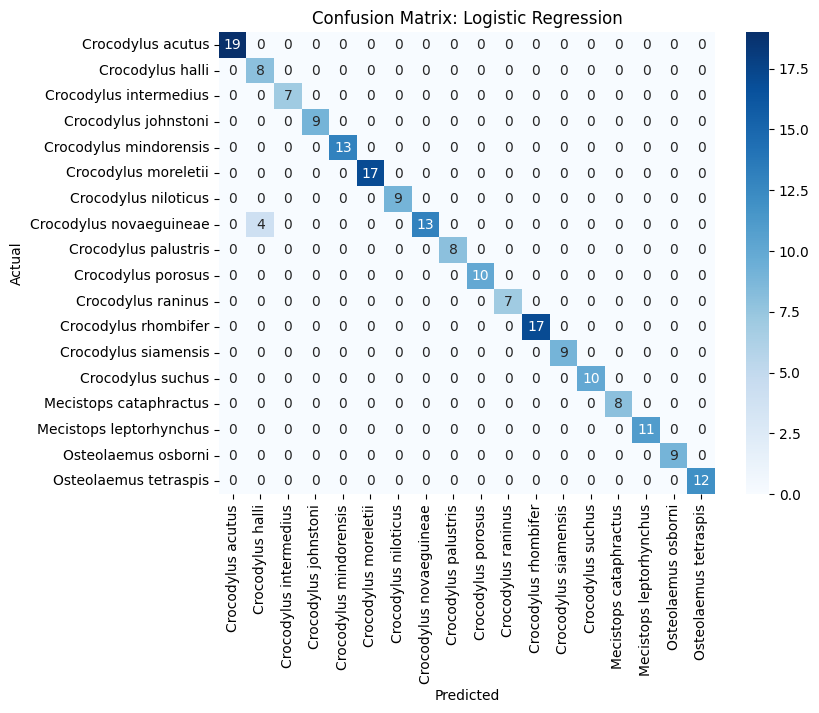


--- Confusion Matrix for K-Nearest Neighbors ---


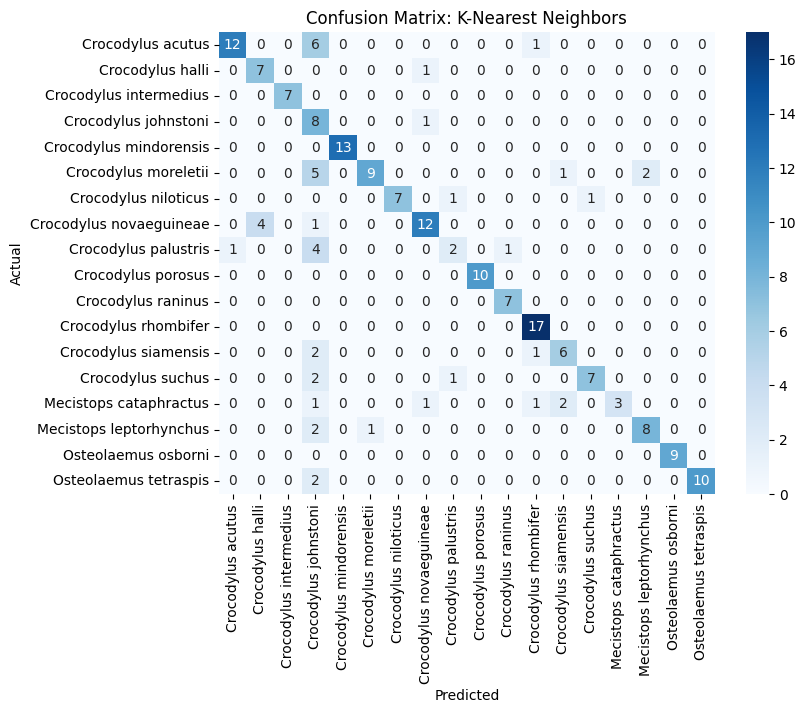


--- Confusion Matrix for Support Vector Machine ---


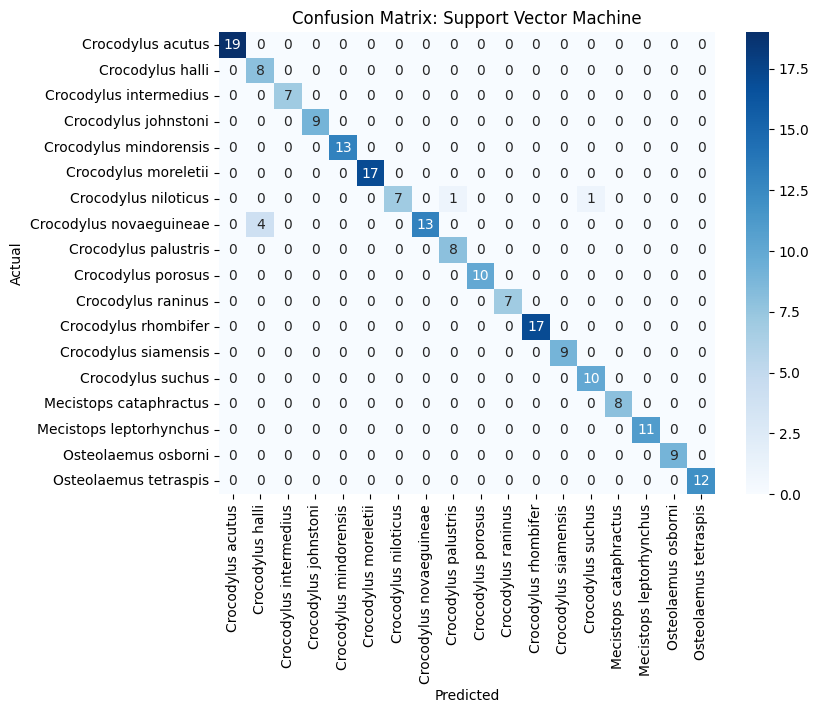


--- Confusion Matrix for Random Forest ---


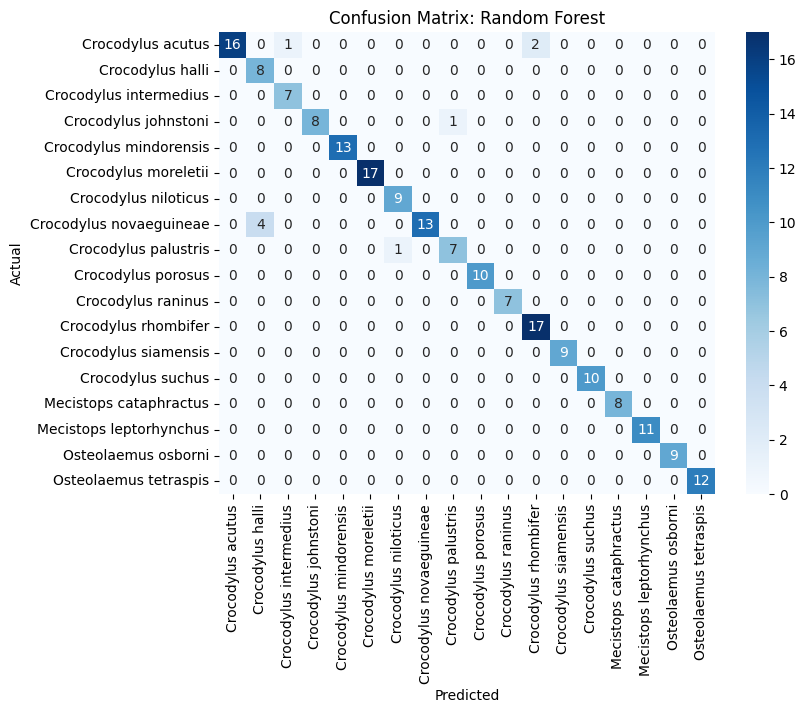

c:\Users\trian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:23:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- Confusion Matrix for XGBoost ---


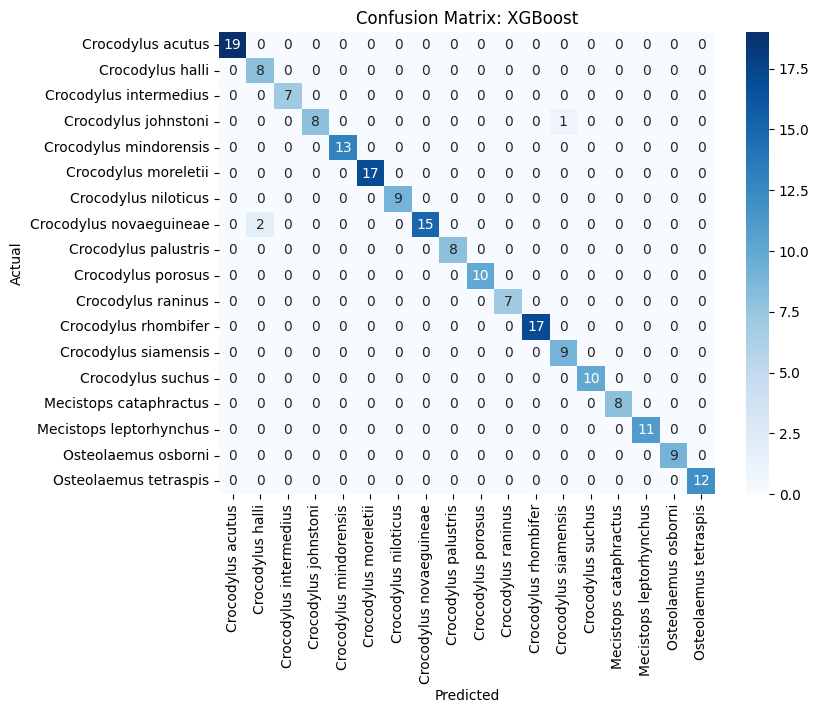

In [26]:
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0, target_names=le.classes_, output_dict=True)

    results_list.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1-Score": f1_weighted
    })

  # --- Confusion Matrix ---
    print(f"--- Confusion Matrix for {name} ---")
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix: {name}')
    plt.show()
    plt.close()   # <-- penting biar tidak overwrite figure berikutnya
    print("="*60 + "\n")

In [28]:
from sklearn.pipeline import Pipeline
import xgboost as xgb

# 1. Choose your best model and initialize it
# We'll use XGBoost as the example
best_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# 2. Create the final pipeline
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

# 3. Train the final pipeline on your ENTIRE dataset (X and y_encoded)
# This creates the final, ready-to-use model
final_pipeline.fit(X, y_encoded)

print("✅ Final model has been trained and is ready for predictions!")

c:\Users\trian\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:11:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Final model has been trained and is ready for predictions!


In [33]:
new_data = pd.DataFrame({
    'Observed Length (m)': [3.1],
    'Observed Weight (kg)': [150.5],
    'Age Class': ['Adult'],
    'Sex': ['Male'],
    'Country/Region': ['Mexico'],
    'Habitat Type': ['Rivers'],
    'Season': ['Winter']
})

print(f"New data to predict: {new_data}")

New data to predict:    Observed Length (m)  Observed Weight (kg) Age Class   Sex Country/Region  \
0                  3.1                 150.5     Adult  Male         Mexico   

  Habitat Type  Season  
0       Rivers  Winter  


In [34]:
# 1. Use the trained pipeline to predict on the new data
predicted_encoded = final_pipeline.predict(new_data)

# 2. Use the LabelEncoder to decode the numerical prediction back to a string
predicted_species = le.inverse_transform(predicted_encoded)

# 3. Print the final, human-readable result
print(f"\n🔮 Predicted Species: {predicted_species[0]}")


🔮 Predicted Species: Crocodylus moreletii
